In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# total data
m = 500
# feature
X = 6 * np.random.rand(m, 1) - 3
# target
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

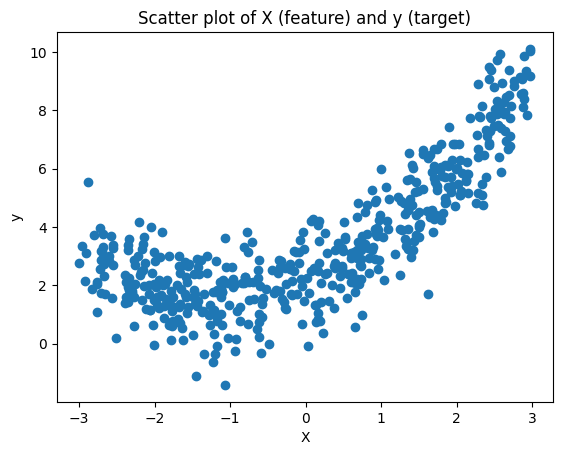

In [3]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot of X (feature) and y (target)")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=25)

In [10]:
poly_features = PolynomialFeatures(degree=4, include_bias=True)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [28]:
model1 = SGDRegressor(fit_intercept=False, loss='squared_error', penalty=None, max_iter=500,
                      early_stopping=True, n_iter_no_change=10, tol=1e-3, learning_rate='constant', eta0=0.01, verbose=1
                      )

model2 = SGDRegressor(fit_intercept=False, loss='squared_error', penalty='l2', alpha=1, max_iter=500,
                      early_stopping=True, n_iter_no_change=10, tol=1e-3, learning_rate='constant', eta0=0.01, verbose=1
                      )

model3 = SGDRegressor(fit_intercept=False, loss='squared_error', penalty='l2', alpha=25, max_iter=500, early_stopping=True,
                      n_iter_no_change=10, tol=1e-3, learning_rate='constant', eta0=0.01, verbose=1
                      )

In [29]:
model1.fit(X_train_poly, y_train)
model2.fit(X_train_poly, y_train)
model3.fit(X_train_poly, y_train)

-- Epoch 1
Norm: 1.61, NNZs: 4, Bias: 0.000000, T: 360, Avg. loss: 6.873061
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 4, Bias: 0.000000, T: 720, Avg. loss: 6.626624
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.66, NNZs: 4, Bias: 0.000000, T: 1080, Avg. loss: 6.735067
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.58, NNZs: 4, Bias: 0.000000, T: 1440, Avg. loss: 6.542086
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.58, NNZs: 4, Bias: 0.000000, T: 1800, Avg. loss: 6.622637
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.93, NNZs: 4, Bias: 0.000000, T: 2160, Avg. loss: 6.661381
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.16, NNZs: 4, Bias: 0.000000, T: 2520, Avg. loss: 6.679450
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.28, NNZs: 4, Bias: 0.000000, T: 2880, Avg. loss: 6.547552
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.13, NNZs: 4, Bias: 0.000000, T: 3240, Avg. loss: 6.664873
Total training time: 0.00 sec

c:\Users\musab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\musab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\musab\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=25, early_stopping=True, fit_intercept=False,
             learning_rate='constant', max_iter=500, n_iter_no_change=10,
             verbose=1)

In [30]:
model1_preds = model1.predict(X_train_poly)
model2_preds = model2.predict(X_train_poly)
model3_preds = model3.predict(X_train_poly)

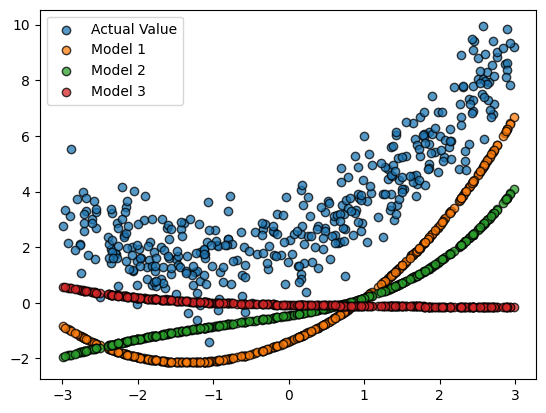

In [31]:
plt.scatter(X_train, y_train, alpha=0.75, edgecolors='black', label='Actual Value')
plt.scatter(X_train, model1_preds, alpha=0.75, edgecolors='black', label='Model 1')
plt.scatter(X_train, model2_preds, alpha=0.75, edgecolors='black', label='Model 2')
plt.scatter(X_train, model3_preds, alpha=0.75, edgecolors='black', label='Model 3')
plt.legend()
plt.show()

In [32]:
model1_training_rmse = np.sqrt(mean_squared_error(y_train, model1_preds))
model2_training_rmse = np.sqrt(mean_squared_error(y_train, model2_preds))
model3_training_rmse = np.sqrt(mean_squared_error(y_train, model3_preds))

print("Model 1 Training RMSE: ", model1_training_rmse)
print("Model 2 Training RMSE: ", model2_training_rmse)
print("Model 3 Training RMSE: ", model3_training_rmse)

Model 1 Training RMSE:  3.6335038886823923
Model 2 Training RMSE:  3.7245837554692978
Model 3 Training RMSE:  4.239839295949335


In [33]:
model1_test_rmse = np.sqrt(mean_squared_error(y_test, model1.predict(X_test_poly)))
model2_test_rmse = np.sqrt(mean_squared_error(y_test, model2.predict(X_test_poly)))
model3_test_rmse = np.sqrt(mean_squared_error(y_test, model3.predict(X_test_poly)))

print("Model 1 Test RMSE: ", model1_test_rmse)
print("Model 2 Test RMSE: ", model2_test_rmse)
print("Model 3 Test RMSE: ", model3_test_rmse)

Model 1 Test RMSE:  3.7749570549934166
Model 2 Test RMSE:  3.844632369147872
Model 3 Test RMSE:  4.4796146425966334


In [34]:
print('Model 1 Variance: ', np.abs(model1_training_rmse - model1_test_rmse))
print('Model 2 Variance: ', np.abs(model2_training_rmse - model2_test_rmse))
print('Model 3 Variance: ', np.abs(model3_training_rmse - model3_test_rmse))

Model 1 Variance:  0.14145316631102434
Model 2 Variance:  0.12004861367857433
Model 3 Variance:  0.23977534664729827


### Iris Dataset

`scikit-learn` comes with a few small standard datasets that do not require to download any file from some external website. The dataset is usually downloaded in a `dictionary`.

In [39]:
data = pd.read_csv('./data/iris.csv')
data.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
26,5.0,3.4,1.6,0.4,Setosa
137,6.4,3.1,5.5,1.8,Virginica
99,5.7,2.8,4.1,1.3,Versicolor
37,4.9,3.6,1.4,0.1,Setosa
130,7.4,2.8,6.1,1.9,Virginica


We will use `sepal width`, `petal length`, and `petal width` to predict `sepal length`.

In [40]:
# Features
X = data.iloc[:, 1:4]
X.head()

,sepal.width,petal.length,petal.width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [41]:
# Target
y = data.iloc[:, 0]
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal.length, dtype: float64

### Standardization / Scaling

Since we will be using `SGDRegressor`, it is necessary that all the features are scaled similarly. For this, we will use the `StandardScaler` or the `MinMaxScaler`. You can find more about feature scaling [here](https://scikit-learn.org/stable/modules/preprocessing.html).

In [48]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))
X_new_mm = mm_scaler.fit_transform(X)

In [52]:
pd.DataFrame(X_new_mm, columns=X.columns).head()

,sepal.width,petal.length,petal.width
0,0.625000,0.067797,0.041667
1,0.416667,0.067797,0.041667
2,0.500000,0.050847,0.041667
3,0.458333,0.084746,0.041667
4,0.666667,0.067797,0.041667


### Train-Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new_mm,
    y,
    train_size=0.80,
    random_state=25,
    shuffle=True,
)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


### Modelling

In [56]:
model = SGDRegressor(
    fit_intercept=False,
    loss='squared_error',
    penalty='l1',
    alpha=0.5,
    max_iter=500,
    early_stopping=True,
    n_iter_no_change=10,
    tol=1e-3,
    learning_rate='constant',
    eta0=0.01,
    verbose=2
)

In [57]:
model.fit(X_train, y_train)

-- Epoch 1
Norm: 3.50, NNZs: 3, Bias: 0.000000, T: 108, Avg. loss: 10.504932
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 5.39, NNZs: 3, Bias: 0.000000, T: 216, Avg. loss: 4.351204
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 6.62, NNZs: 3, Bias: 0.000000, T: 324, Avg. loss: 2.643794
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 7.50, NNZs: 3, Bias: 0.000000, T: 432, Avg. loss: 2.003820
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 8.24, NNZs: 3, Bias: 0.000000, T: 540, Avg. loss: 1.751855
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 8.91, NNZs: 3, Bias: 0.000000, T: 648, Avg. loss: 1.631136
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 9.51, NNZs: 3, Bias: 0.000000, T: 756, Avg. loss: 1.531472
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 10.07, NNZs: 3, Bias: 0.000000, T: 864, Avg. loss: 1.473546
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 10.60, NNZs: 3, Bias: 0.000000, T: 972, Avg. loss: 1.424531
Total training time: 0.01 seconds

SGDRegressor(alpha=0.5, early_stopping=True, fit_intercept=False,
             learning_rate='constant', max_iter=500, n_iter_no_change=10,
             penalty='l1', verbose=2)

In [58]:
model.coef_

array([5.21512697, 4.03320567, 0.72036824])

In [59]:
model.intercept_

array([0.])

### Evaluation

In [60]:
# Training Data Evaluation
training_predictions = model.predict(X_train)

training_mae = mean_absolute_error(y_train, training_predictions)
training_mse = mean_squared_error(y_train, training_predictions)
training_rmse = np.sqrt(training_mse)

print("Training MAE: ", training_mae)
print("Training MSE: ", training_mse)
print("Training RMSE: ", training_rmse)

Training MAE:  1.3478209186951224
Training MSE:  2.2837520468552204
Training RMSE:  1.5112088031953825


In [61]:
# Test Data Evaluation
test_predictions = model.predict(X_test)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

print("Test MAE: ", test_mae)
print("Test MSE: ", test_mse)
print("Test RMSE: ", test_rmse)

Test MAE:  1.4812316239738845
Test MSE:  2.7811533221673934
Test RMSE:  1.6676790225242366
